<a href="https://colab.research.google.com/github/jvance7-ut/Portfolio/blob/main/NLP_Level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP Business Reviews for a business with one store in each county in Delaware





In [ ]:
##If Needed
#pip install nltk


In [ ]:
import random
import pandas as pd


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Create Data

In [ ]:

def create_random_dataset(input_list, dataset_size, replace = True):
  if replace:
        # Sampling with replacement (resampling allowed)
      dataset = [random.choice(input_list) for _ in range(dataset_size)]
      dataset = pd.DataFrame(dataset)
  else:
        # Sampling without replacement
      dataset = random.sample(input_list, dataset_size)
      dataset = pd.DataFrame(dataset)
  return dataset

# Example usage:
my_list_reviews = ['I like their products', 'Customer service was horrible',
                    'There is never any parking', 'eco-friendly bagging',
                    'I wish they used plastic bags', 'Their workers are friendly',
                    'Parking is easy', 'They never have what I want in stock',
                    'Prices are low', 'EVerything is too expensive', 'Good',
                    'ok', 'Someone got arrested there', 'has every thing i need',
                    'Their workers our not smart', 'Good place to shoop',
                    'Nice products, wish it was closer to home', 'No parking!!! And loud...',
                    'Only go during sales, not worth prices otherwise', 'Great store',
                    'I like it there', 'There prices are high', 'clean and quiet',
                    'Dirty restrooms'
                   ]

my_list_counties = ['Kent', 'Sussex', 'New Castle']
dataset_size = 1000

reviews = create_random_dataset(my_list_reviews, dataset_size, replace = True)
counties= create_random_dataset(my_list_counties, dataset_size)


delaware_reviews = pd.concat([reviews, counties], axis=1)
delaware_reviews.columns = ['Review', 'County']
delaware_reviews



,Review,County
0,has every thing i need,Kent
1,Someone got arrested there,New Castle
2,Dirty restrooms,New Castle
3,Their workers our not smart,New Castle
4,Good place to shoop,Sussex
...,...,...
995,has every thing i need,Sussex
996,has every thing i need,Sussex
997,Someone got arrested there,Sussex
998,eco-friendly bagging,Sussex


In [ ]:
positive_reviews = [
    'I like their products', 'eco-friendly bagging', 'Their workers are friendly',
    'Parking is easy', 'Prices are low', 'Good', 'has every thing i need',
    'Good place to shoop', 'Great store',  'I like it there', 'clean and quiet'
]

mixed_reviews = [
    'ok', 'Nice products, wish it was closer to home',
    'Only go during sales, not worth prices otherwise'
]

negative_reviews = [
    'Customer service was horrible', 'There is never any parking',
    'I wish they used plastic bags', 'They never have what I want in stock',
    'EVerything is too expensive', 'Someone got arrested there',
    'Their workers our not smart', 'No parking!!! And loud...', 'There prices are high',
    'Dirty restrooms'
]

In [ ]:
print(len(my_list_reviews), len(positive_reviews), len(mixed_reviews), len(negative_reviews) )
len(my_list_reviews) == (len(positive_reviews) + len(mixed_reviews) + len(negative_reviews))

24 11 3 10


True

In [ ]:
delaware_reviews.loc[delaware_reviews['Review'].isin(positive_reviews), 'Actual Score'] = 1
delaware_reviews.loc[delaware_reviews['Review'].isin(mixed_reviews), 'Actual Score'] = 0
delaware_reviews.loc[delaware_reviews['Review'].isin(negative_reviews), 'Actual Score'] = -1

delaware_reviews

,Review,County,Actual Score
0,has every thing i need,Kent,1.0
1,Someone got arrested there,New Castle,-1.0
2,Dirty restrooms,New Castle,-1.0
3,Their workers our not smart,New Castle,-1.0
4,Good place to shoop,Sussex,1.0
...,...,...,...
995,has every thing i need,Sussex,1.0
996,has every thing i need,Sussex,1.0
997,Someone got arrested there,Sussex,-1.0
998,eco-friendly bagging,Sussex,1.0


In [ ]:
analyzer = SentimentIntensityAnalyzer()

#This is how we tune the sentiment analyzer
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 1
    elif scores['compound'] < -0.05:
        return -1
    else:
        return 0

delaware_reviews['NLP Score'] = delaware_reviews['Review'].apply(get_sentiment)
#print(df[['text_column', 'sentiment']].head())

print(delaware_reviews)

                          Review      County  Actual Score  NLP Score
0         has every thing i need        Kent           1.0          0
1     Someone got arrested there  New Castle          -1.0         -1
2                Dirty restrooms  New Castle          -1.0         -1
3    Their workers our not smart  New Castle          -1.0         -1
4            Good place to shoop      Sussex           1.0          1
..                           ...         ...           ...        ...
995       has every thing i need      Sussex           1.0          0
996       has every thing i need      Sussex           1.0          0
997   Someone got arrested there      Sussex          -1.0         -1
998         eco-friendly bagging      Sussex           1.0          0
999    No parking!!! And loud...        Kent          -1.0         -1

[1000 rows x 4 columns]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np


rank_labels = ["Positive", "Mixed", "Negative"]

raw_accuracy = accuracy_score(delaware_reviews['Actual Score'], delaware_reviews['NLP Score'])
conf_matrix = confusion_matrix(delaware_reviews['Actual Score'], delaware_reviews['NLP Score'])




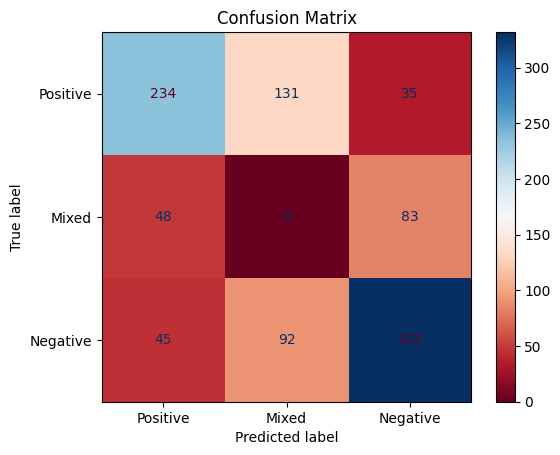

Accuracy:  0.566 
 Confusion Matrix: 
 [[234 131  35]
 [ 48   0  83]
 [ 45  92 332]]


In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rank_labels)
disp.plot(cmap='RdBu')  # You can change the colormap
plt.title('Confusion Matrix')
plt.show()

print("Accuracy: ", raw_accuracy, "\n Confusion Matrix: \n", conf_matrix)

Now let's see what happens when we clean up the entries

In [ ]:
delaware_reviews

,Review,County,Actual Score,NLP Score
0,has every thing i need,Kent,1.0,0
1,Someone got arrested there,New Castle,-1.0,-1
2,Dirty restrooms,New Castle,-1.0,-1
3,Their workers our not smart,New Castle,-1.0,-1
4,Good place to shoop,Sussex,1.0,1
...,...,...,...,...
995,has every thing i need,Sussex,1.0,0
996,has every thing i need,Sussex,1.0,0
997,Someone got arrested there,Sussex,-1.0,-1
998,eco-friendly bagging,Sussex,1.0,0


In [ ]:
unique = delaware_reviews['Review'].unique()
print(unique)


['has every thing i need' 'Someone got arrested there' 'Dirty restrooms'
 'Their workers our not smart' 'Good place to shoop' 'Prices are low'
 'Great store' 'No parking!!! And loud...' 'ok'
 'Nice products, wish it was closer to home' 'Good'
 'EVerything is too expensive' 'Their workers are friendly'
 'I like their products' 'eco-friendly bagging' 'Parking is easy'
 'There prices are high'
 'Only go during sales, not worth prices otherwise'
 'I wish they used plastic bags' 'There is never any parking'
 'They never have what I want in stock' 'Customer service was horrible'
 'clean and quiet' 'I like it there']


In [ ]:
delaware_cleaned =delaware_reviews

In [ ]:
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('-', ' ', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('!', '', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('shoop', 'shop', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('EV', 'Ev', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('There prices', 'Their prices', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('our not', 'are not', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace(',', '', regex=False)
delaware_cleaned['Review'] = delaware_reviews['Review'].str.replace('.', '', regex=False)



In [ ]:
print(delaware_cleaned)

                          Review      County  Actual Score  NLP Score
0         has every thing i need        Kent           1.0          0
1     Someone got arrested there  New Castle          -1.0         -1
2                Dirty restrooms  New Castle          -1.0         -1
3    Their workers are not smart  New Castle          -1.0         -1
4             Good place to shop      Sussex           1.0          1
..                           ...         ...           ...        ...
995       has every thing i need      Sussex           1.0          0
996       has every thing i need      Sussex           1.0          0
997   Someone got arrested there      Sussex          -1.0         -1
998         eco friendly bagging      Sussex           1.0          0
999          No parking And loud        Kent          -1.0         -1

[1000 rows x 4 columns]


In [ ]:
delaware_cleaned['NLP Score'] = delaware_cleaned['Review'].apply(get_sentiment)

rank_labels_cleaned = ["Positive", "Mixed", "Negative"]

raw_accuracy_cleaned = accuracy_score(delaware_cleaned['Actual Score'], delaware_cleaned['NLP Score'])
conf_matrix_cleaned = confusion_matrix(delaware_cleaned['Actual Score'], delaware_cleaned['NLP Score'])



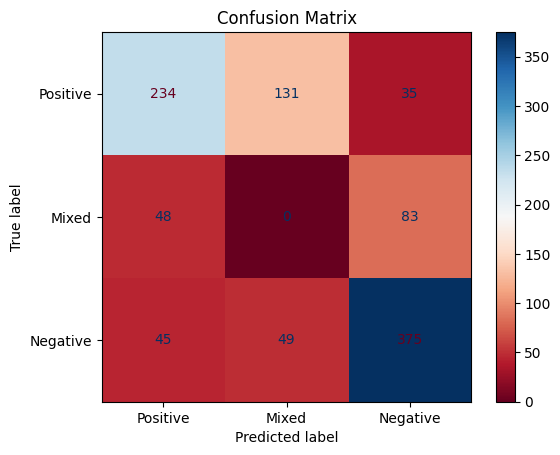

Accuracy:  0.609 
 Confusion Matrix: 
 [[234 131  35]
 [ 48   0  83]
 [ 45  49 375]]


In [ ]:
disp_cleaned = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_cleaned, display_labels = rank_labels_cleaned)
disp_cleaned.plot(cmap='RdBu')  # You can change the colormap
 #Red/blue is typically colorblind friendly and better for the user's subconscious comprehension
plt.title('Confusion Matrix')
plt.show()

print("Accuracy: ", raw_accuracy_cleaned, "\n Confusion Matrix: \n", conf_matrix_cleaned)

This is already an improvement

Let's try simplifying the algorithm to discovering good vs bad

We would expect the accuracy to increase.  If that is confusing, think about it this way:
   

*   If you were to randomly assign guesses to three categories with relatively equal probability, what would you expect?  About a 33% accuracy.
*   If you did the same with only two categories, the accuracy would increase to 50%


In [ ]:
delaware_two = delaware_cleaned

In [ ]:
#change the number of sentiment labels
for index, rows in delaware_two.iterrows():

  if rows['Review'] == 'ok':
    delaware_two.loc[index, 'Actual Score'] = 1
  elif rows['Review'] == 'Nice products wish it was closer to home':
    delaware_two.loc[index, 'Actual Score'] = 1
  elif rows['Review'] == 'Only go during sales not worth prices otherwise':
    delaware_two.loc[index, 'Actual Score'] = -1



#Check that there are only two different options
print(delaware_two['Actual Score'].unique())


[ 1. -1.]


In [ ]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 1
    else:
        return -1

delaware_two['NLP Score'] = delaware_two['Review'].apply(get_sentiment)
print(delaware_two['NLP Score'])

0      1
1     -1
2     -1
3      1
4     -1
      ..
995    1
996   -1
997    1
998   -1
999    1
Name: NLP Score, Length: 1000, dtype: int64


In [ ]:
rank_labels_two = ["Positive", "Negative"]

raw_accuracy_two = accuracy_score(delaware_two['Actual Score'], delaware_two['NLP Score'])
conf_matrix_two = confusion_matrix(delaware_two['Actual Score'], delaware_two['NLP Score'])

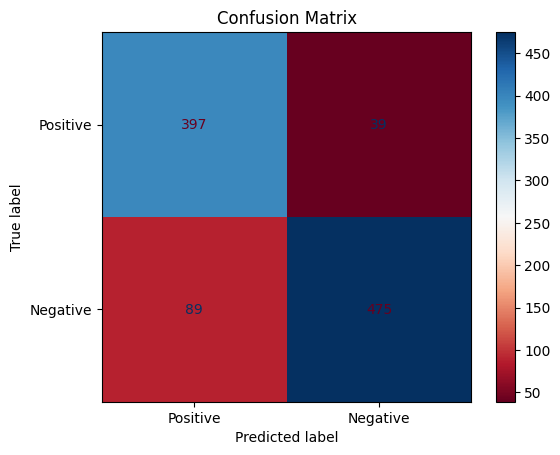

Accuracy:  0.872 
 Confusion Matrix: 
 [[397  39]
 [ 89 475]]


In [ ]:
disp_two = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_two, display_labels = rank_labels_two)
disp_two.plot(cmap='RdBu')  # You can change the colormap
plt.title('Confusion Matrix')
plt.show()

print("Accuracy: ", raw_accuracy_two, "\n Confusion Matrix: \n", conf_matrix_two)